# Hyperparameter tuning model using Keras-hyperparameter tuning

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./datasets/Real_Combine.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1093 non-null   float64
 1   TM      1093 non-null   float64
 2   Tm      1093 non-null   float64
 3   SLP     1093 non-null   float64
 4   H       1093 non-null   float64
 5   VV      1093 non-null   float64
 6   V       1093 non-null   float64
 7   VM      1093 non-null   float64
 8   PM 2.5  1092 non-null   float64
dtypes: float64(9)
memory usage: 77.0 KB


In [5]:
df = df.dropna()

In [6]:
from sklearn.model_selection import train_test_split as tts
x = df.iloc[:, 0:8]
y = df.iloc[:, 8]
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.25, random_state=42)

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras_tuner import RandomSearch
from keras.optimizers import Adam

In [15]:
def hyper_tune(param):
    model = Sequential()
    for i in range(param.Int('num_layers', 2, 20)):
        model.add(Dense(units=param.Int('Unit'+str(i), 32, 512, 32), activation='tanh'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(optimizer=Adam(param.Choice('learning_rate', [0.001, 0.002, 0.003])), 
                  loss='mean_absolute_error', 
                  metrics=['mean_absolute_error'])
    return model

In [16]:
tuner = RandomSearch(
    hypermodel=hyper_tune,
    objective='val_mean_absolute_error',
    max_trials = 5,
    directory = 'project',
    overwrite = True,
    project_name = 'AQI'    
)

In [17]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x, y, test_size=0.25, random_state=42)


In [18]:
tuner.search(x_train, y_train, epochs = 5, validation_data = (x_test, y_test))

Trial 5 Complete [00h 00m 02s]
val_mean_absolute_error: 63.65956115722656

Best val_mean_absolute_error So Far: 62.59090805053711
Total elapsed time: 00h 00m 13s


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

best_hp = tuner.get_best_hyperparameters(1)[0]
model = hyper_tune(best_hp)
history = model.fit(x_train, y_train, epochs = 5, validation_data=(x_test, y_test))

Epoch 1/5
26/26 [==============================] - 1s 13ms/step - loss: 80.3741 - mean_absolute_error: 80.3741 - val_loss: 67.0035 - val_mean_absolute_error: 67.0035
Epoch 2/5
26/26 [==============================] - 0s 4ms/step - loss: 68.2193 - mean_absolute_error: 68.2193 - val_loss: 63.0253 - val_mean_absolute_error: 63.0253
Epoch 3/5
26/26 [==============================] - 0s 4ms/step - loss: 67.2649 - mean_absolute_error: 67.2649 - val_loss: 62.5807 - val_mean_absolute_error: 62.5807
Epoch 4/5
26/26 [==============================] - 0s 4ms/step - loss: 67.0570 - mean_absolute_error: 67.0570 - val_loss: 62.7297 - val_mean_absolute_error: 62.7297
Epoch 5/5
26/26 [==============================] - 0s 4ms/step - loss: 67.1545 - mean_absolute_error: 67.1545 - val_loss: 62.6627 - val_mean_absolute_error: 62.6627


In [20]:
loss = history.history['loss'] 
mae = history.history['mean_absolute_error']
val_loss = history.history['val_loss']
val_mae = history.history['val_mean_absolute_error']

[]

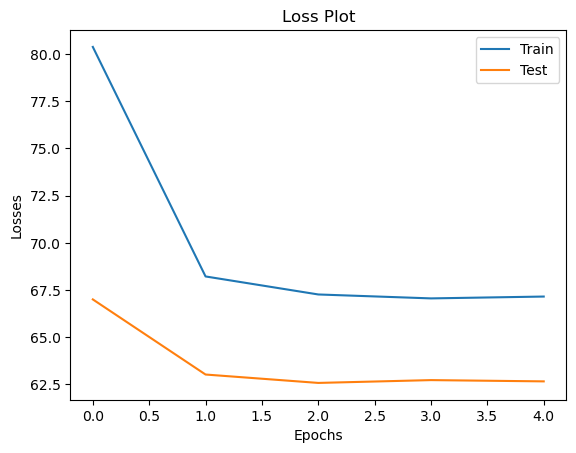

In [21]:
plt.plot(loss)
plt.plot(val_loss)
plt.title("Loss Plot")
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend(["Train", "Test"])
plt.plot()

[]

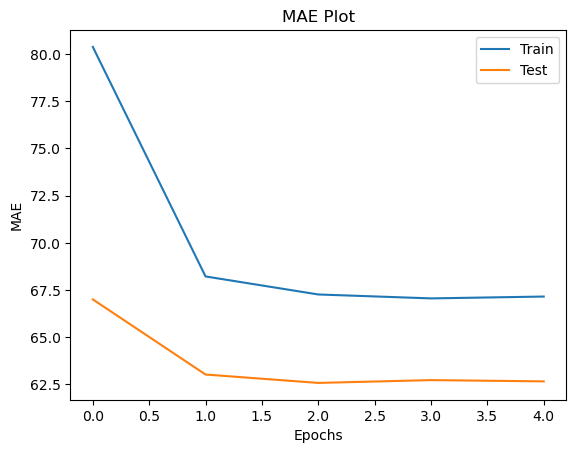

In [22]:
plt.plot(mae)
plt.plot(val_mae)
plt.title("MAE Plot")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend(["Train", "Test"])
plt.plot()